<a href="https://colab.research.google.com/github/yudhapatria96/Scrape-and-Sentiment-Analysis-Google-Playstore-Review/blob/main/Scrapping_and_Sentimen_AnalysisGoogle_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [1]:
  !pip install -qq google-play-scraper

     |████████████████████████████████| 52 kB 562 kB/s 


In [62]:
import json
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string

from sklearn.model_selection import train_test_split 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, recall_score,precision_score, accuracy_score,confusion_matrix

  
from tqdm import tqdm

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#Setup Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "gdrive/MyDrive/Semua Tentang Data/Google Playstore Review Scrape/"

Mounted at /content/gdrive


# Scrape Googel Playstore Reviews

In [4]:
app_packages = [
    'com.grabtaxi.passenger',
    'com.gojek.app'   
]

In [5]:
app_infos = []

for application in tqdm(app_packages):
  info = app(application, lang='id', country='id')
  del info['comments']
  app_infos.append(info)

100%|██████████| 2/2 [00:00<00:00,  6.31it/s]


In [6]:
def print_json(json_object):
  json_str = json.dumps(
      json_object,
      indent=2,
      sort_keys = True,
      default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [7]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "5.0",
  "androidVersionText": "5.0 dan yang lebih tinggi",
  "appId": "com.grabtaxi.passenger",
  "containsAds": false,
  "contentRating": "Rating 3+",
  "contentRatingDescription": null,
  "currency": "IDR",
  "description": "Grab adalah aplikasi super terkemuka di Asia Tenggara. Kami menawarkan layanan esensial untuk kebutuhan sehari-hari ke lebih dari 670 juta orang di Singapura, Indonesia, Malaysia, Thailand, Filipina, Vietnam, Kamboja, dan Myanmar. Layanan esensial ini terdiri dari Pengiriman (makanan, belanjaan, paket), Transportasi (roda 4, roda 3, roda 2), Keuangan (pinjaman, asuransi, pembayaran nontunai, manajemen harta), Usaha, dan Lain-lain. Misi kami adalah memajukan Asia Tenggara dengan melakukan pemberdayaan ekonomi untuk semua orang di wilayah ini.\r\n\r\n\r\nPengiriman makanan yang memenuhi keinginanmu\r\nGrabFood: Pesan dari restoran favoritmu dan makanan akan dikirim langsung ke rumahmu\r\n\r\nPengiriman belanjaan yang mu

In [8]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]


In [9]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv(path +'apps.csv', index =None, header= True)

In [10]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1,6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
          ap,
          lang='id',
          country = 'id',
          sort = sort_order,
          count=200 if score == 3 else 100,
          filter_score_with = score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 2/2 [00:06<00:00,  3.22s/it]


In [11]:
print_json(app_reviews[0])

{
  "appId": "com.grabtaxi.passenger",
  "at": "2021-08-12 00:37:48",
  "content": "Baru tau dari driver, ternyata dalam orderan ada biaya pemesanan 6000, biaya asuransi 1000. Pantesan aja jadi mahal tarifnya. Blom lagi bagi driver potongan 20%, jadi berapa yang didapat driver ya? Kirain pake Indriver atau Maxim kasian ke drivernya, ternyata grab lebih parah pendapatan buat drivernya",
  "repliedAt": "2021-08-12 00:50:01",
  "replyContent": "Halo Kak. Maaf ya buat engga nyaman \ud83d\ude47\u200d\u2640\ufe0f\nApabila Kakak menemukan kendala pada penggunaan aplikasi Grab Penumpang maka silakan laporkan melalui link https://grb.to/consumeridhelpcenter agar bisa ditindaklanjuti ya. Terima kasih \ud83d\ude4f",
  "reviewCreatedVersion": "5.162.0",
  "reviewId": "gp:AOqpTOG_vZVsXY1772g79iymPTBKwV2xmcTqh4bu4FwECyQD0SDcXC8OzMkc71vsp22fCZDze9FggvrsD-TxMUw",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 10,
  "userImage": "https://play-lh.googleusercontent.com/a-/AOh14GgkXJU-Ki

In [12]:
app_reviews_df = pd.DataFrame(app_reviews)

app_reviews_df = app_reviews_df.sort_values(["appId","at"])


In [13]:
app_reviews_df.to_csv(path+'hasilreviews.csv', index=None, header=True)

In [14]:
app_reviews_df.isnull()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
1761,False,False,False,False,False,False,False,False,False,False,False,False
1771,False,False,False,False,False,False,False,False,False,False,False,False
1735,False,False,False,False,False,False,False,False,False,False,False,False
1791,False,False,False,False,False,False,False,False,False,False,False,False
2075,False,False,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1104,False,False,False,False,False,False,False,False,True,True,False,False
1103,False,False,False,False,False,False,True,False,True,True,False,False
1102,False,False,False,False,False,False,True,False,False,False,False,False
1101,False,False,False,False,False,False,False,False,True,True,False,False


#Monthly Average Rating

In [15]:
app_reviews_df.fillna("No Replay", inplace=True)
app_reviews_df.isnull()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
1761,False,False,False,False,False,False,False,False,False,False,False,False
1771,False,False,False,False,False,False,False,False,False,False,False,False
1735,False,False,False,False,False,False,False,False,False,False,False,False
1791,False,False,False,False,False,False,False,False,False,False,False,False
2075,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1104,False,False,False,False,False,False,False,False,False,False,False,False
1103,False,False,False,False,False,False,False,False,False,False,False,False
1102,False,False,False,False,False,False,False,False,False,False,False,False
1101,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
app_reviews_df = app_reviews_df.set_index('appId', inplace=False)

app_reviews_gojek_df = app_reviews_df.loc['com.gojek.app']
app_reviews_grab_df = app_reviews_df.loc['com.grabtaxi.passenger']

In [17]:
print(app_reviews_gojek_df)
print(app_reviews_grab_df)

                                                        reviewId  ...      sortOrder
appId                                                             ...               
com.gojek.app  gp:AOqpTOGSzXBeD-YFCiB4zM-04Dpxk_P3tkuTdGpVxES...  ...  most_relevant
com.gojek.app  gp:AOqpTOFppJW7XsVsjlJRd9oZW1fUinXW6BBySA_lvI_...  ...  most_relevant
com.gojek.app  gp:AOqpTOHfiS07yPfpSHc9mnfNDWYC4YbXcYKVMV0SogM...  ...  most_relevant
com.gojek.app  gp:AOqpTOHMbXllzyG9YHRP5cXqBUZN7OHEuucHroV3H2b...  ...  most_relevant
com.gojek.app  gp:AOqpTOEEesKuhu5dUOjh3aIyJ7BI2LvTCTVWTzNRx9b...  ...  most_relevant
...                                                          ...  ...            ...
com.gojek.app  gp:AOqpTOHBwaolssvlRVBTNJ4l7H2viCS04sTDaGtkltX...  ...         newest
com.gojek.app  gp:AOqpTOGMJfywT7y161qLKd72l3wlwS92853ON5DyT6d...  ...         newest
com.gojek.app  gp:AOqpTOGIOylTtQmr9S62heKaVtxcOAtsfuKDZsB5uIh...  ...         newest
com.gojek.app  gp:AOqpTOELqZbXJChPUBYNerL_ScdcnzrvICkiK8Sibdk... 

In [18]:
app_reviews_gojek_df.reset_index(level=0, inplace=True)
app_reviews_grab_df.reset_index(level=0, inplace=True)

print(app_reviews_gojek_df)
print(app_reviews_grab_df)

              appId  ...      sortOrder
0     com.gojek.app  ...  most_relevant
1     com.gojek.app  ...  most_relevant
2     com.gojek.app  ...  most_relevant
3     com.gojek.app  ...  most_relevant
4     com.gojek.app  ...  most_relevant
...             ...  ...            ...
1195  com.gojek.app  ...         newest
1196  com.gojek.app  ...         newest
1197  com.gojek.app  ...         newest
1198  com.gojek.app  ...         newest
1199  com.gojek.app  ...         newest

[1200 rows x 12 columns]
                       appId  ...      sortOrder
0     com.grabtaxi.passenger  ...  most_relevant
1     com.grabtaxi.passenger  ...  most_relevant
2     com.grabtaxi.passenger  ...  most_relevant
3     com.grabtaxi.passenger  ...  most_relevant
4     com.grabtaxi.passenger  ...  most_relevant
...                      ...  ...            ...
1195  com.grabtaxi.passenger  ...         newest
1196  com.grabtaxi.passenger  ...         newest
1197  com.grabtaxi.passenger  ...         newest
1198

In [19]:
print(app_reviews_gojek_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   appId                 1200 non-null   object        
 1   reviewId              1200 non-null   object        
 2   userName              1200 non-null   object        
 3   userImage             1200 non-null   object        
 4   content               1200 non-null   object        
 5   score                 1200 non-null   int64         
 6   thumbsUpCount         1200 non-null   int64         
 7   reviewCreatedVersion  1200 non-null   object        
 8   at                    1200 non-null   datetime64[ns]
 9   replyContent          1200 non-null   object        
 10  repliedAt             1200 non-null   object        
 11  sortOrder             1200 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 112.6+ KB
None


In [20]:
app_reviews_gojek_mei = app_reviews_gojek_df[app_reviews_gojek_df['at'].dt.strftime('%Y-%m') == '2021-05']
app_reviews_gojek_juni = app_reviews_gojek_df[app_reviews_gojek_df['at'].dt.strftime('%Y-%m') == '2021-06']
app_reviews_gojek_juli = app_reviews_gojek_df[app_reviews_gojek_df['at'].dt.strftime('%Y-%m') == '2021-07']

#membuat kolom baru
app_reviews_gojek_mei["average_rating"]  = app_reviews_gojek_mei["score"].mean()
app_reviews_gojek_juni["average_rating"] = app_reviews_gojek_juni["score"].mean()
app_reviews_gojek_juli["average_rating"] = app_reviews_gojek_juli["score"].mean()

print(app_reviews_gojek_mei['average_rating'])
print(app_reviews_gojek_juni['average_rating'])
print(app_reviews_gojek_juli['average_rating'])

0    3.222222
1    3.222222
2    3.222222
3    3.222222
4    3.222222
5    3.222222
6    3.222222
7    3.222222
8    3.222222
Name: average_rating, dtype: float64
9     3.283784
10    3.283784
11    3.283784
12    3.283784
13    3.283784
        ...   
78    3.283784
79    3.283784
80    3.283784
81    3.283784
82    3.283784
Name: average_rating, Length: 74, dtype: float64
83     3.273148
84     3.273148
85     3.273148
86     3.273148
87     3.273148
         ...   
294    3.273148
295    3.273148
296    3.273148
297    3.273148
298    3.273148
Name: average_rating, Length: 216, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [21]:
app_reviews_grab_mei = app_reviews_grab_df[app_reviews_grab_df['at'].dt.strftime('%Y-%m') == '2021-05']
app_reviews_grab_juni = app_reviews_grab_df[app_reviews_grab_df['at'].dt.strftime('%Y-%m') == '2021-06']
app_reviews_grab_juli = app_reviews_grab_df[app_reviews_grab_df['at'].dt.strftime('%Y-%m') == '2021-07']

#membuat kolom baru
app_reviews_grab_mei["average_rating"]  = app_reviews_grab_mei["score"].mean()
app_reviews_grab_juni["average_rating"] = app_reviews_grab_juni["score"].mean()
app_reviews_grab_juli["average_rating"] = app_reviews_grab_juli["score"].mean()

print(app_reviews_grab_mei['average_rating'])
print(app_reviews_grab_juni['average_rating'])
print(app_reviews_grab_juli['average_rating'])

0     3.033333
1     3.033333
2     3.033333
3     3.033333
4     3.033333
5     3.033333
6     3.033333
7     3.033333
8     3.033333
9     3.033333
10    3.033333
11    3.033333
12    3.033333
13    3.033333
14    3.033333
15    3.033333
16    3.033333
17    3.033333
18    3.033333
19    3.033333
20    3.033333
21    3.033333
22    3.033333
23    3.033333
24    3.033333
25    3.033333
26    3.033333
27    3.033333
28    3.033333
29    3.033333
Name: average_rating, dtype: float64
30     3.016807
31     3.016807
32     3.016807
33     3.016807
34     3.016807
         ...   
144    3.016807
145    3.016807
146    3.016807
147    3.016807
148    3.016807
Name: average_rating, Length: 119, dtype: float64
149    3.038961
150    3.038961
151    3.038961
152    3.038961
153    3.038961
         ...   
375    3.038961
376    3.038961
377    3.038961
378    3.038961
379    3.038961
Name: average_rating, Length: 231, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [22]:
df_all_grab = pd.concat([app_reviews_grab_mei.iloc[0], app_reviews_grab_juni.iloc[0], app_reviews_grab_juli.iloc[0]])
df_all_gojek = pd.concat([app_reviews_gojek_mei.iloc[0], app_reviews_gojek_juni.iloc[0], app_reviews_gojek_juli.iloc[0]])

In [23]:
df_new_plot = {
    'Date':['May', "June", "July"],
    'GrabScore': [round(df_all_grab.average_rating[0],2),round(df_all_grab.average_rating[1],2), round(df_all_grab.average_rating[2],2)],
    'GojekScore': [round(df_all_gojek.average_rating[0],2),round(df_all_gojek.average_rating[1],2), round(df_all_gojek.average_rating[2],2)]
}
df_new_plot = pd.DataFrame(df_new_plot)

In [24]:
print(df_new_plot)

   Date  GrabScore  GojekScore
0   May       3.03        3.22
1  June       3.02        3.28
2  July       3.04        3.27


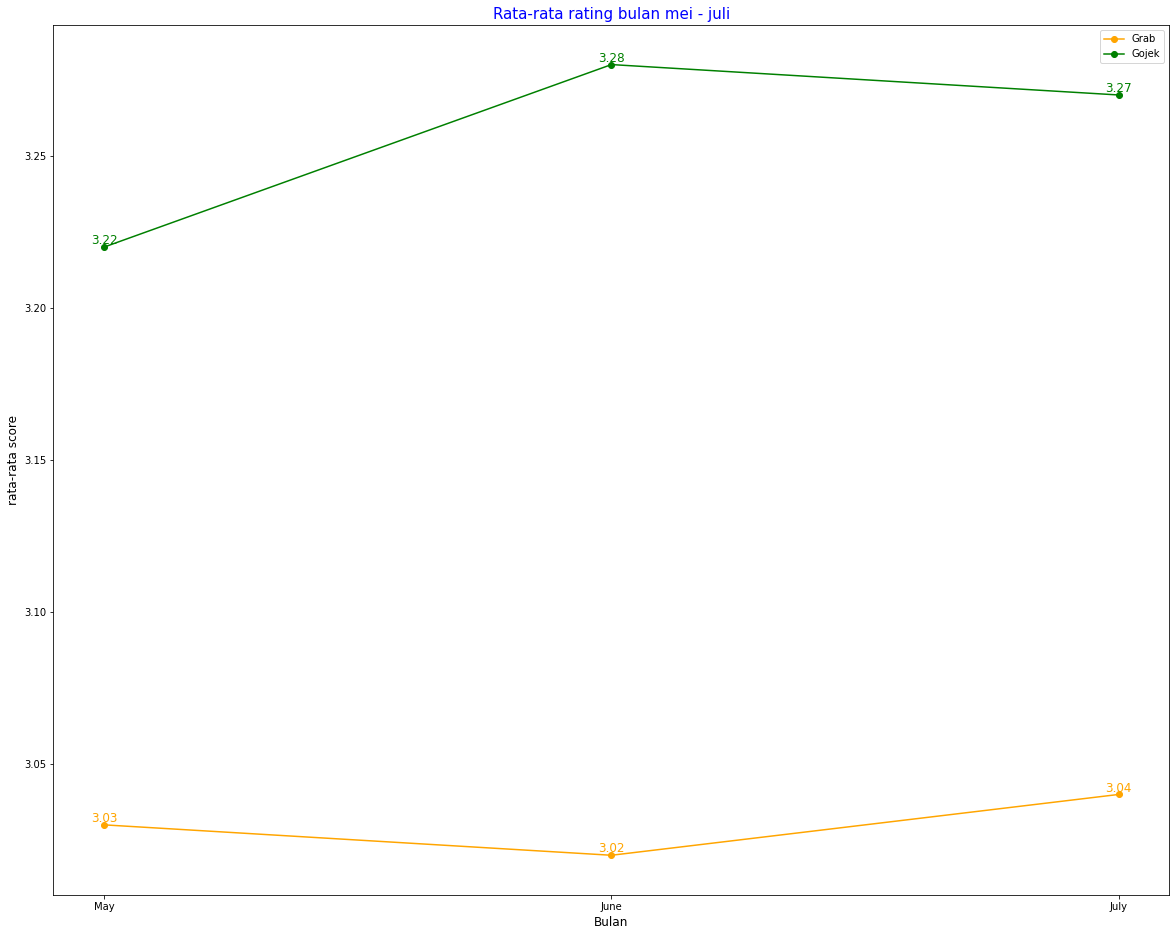

In [25]:
fig = plt.figure(figsize=(20,16))
plt.plot(df_new_plot.Date, df_new_plot.GrabScore, label="Grab", color='orange', marker='o')
plt.plot(df_new_plot.Date, df_new_plot.GojekScore, label="Gojek", color='green', marker='o')
plt.title('Rata-rata rating bulan mei - juli', fontsize=15, color='blue')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('rata-rata score', fontsize=12)


def anotation_data(data_y, color_text):
  for i,j in zip(df_new_plot.Date, data_y):
    plt.annotate(str(j), xy=(i,j), color=color_text,
                  fontsize='large', weight='normal',
                  horizontalalignment = 'center',
                 verticalalignment='bottom'
                 )

anotation_data(df_new_plot.GrabScore, 'orange')
anotation_data(df_new_plot.GojekScore, 'green')

plt.legend()
plt.show()

# Weekly Average Rating

In [26]:
df = pd.DataFrame(app_reviews)
df = df.set_index('appId', inplace=False)
df = df.loc['com.grabtaxi.passenger']
df.reset_index(level=0, inplace=True)

df= df.sort_values(["reviewCreatedVersion"])

In [27]:
print(df.head())

                      appId  ... sortOrder
327  com.grabtaxi.passenger  ...    newest
943  com.grabtaxi.passenger  ...    newest
324  com.grabtaxi.passenger  ...    newest
693  com.grabtaxi.passenger  ...    newest
339  com.grabtaxi.passenger  ...    newest

[5 rows x 12 columns]


In [28]:
df = df[["reviewCreatedVersion", "score"]]

In [29]:
print(df.head())

    reviewCreatedVersion  score
327              5.104.0      2
943              5.104.0      4
324              5.109.0      2
693              5.109.0      3
339              5.110.0      2


In [30]:
df.shape

(1200, 2)

In [31]:
print(df.reviewCreatedVersion.unique())

['5.104.0' '5.109.0' '5.110.0' '5.111.0' '5.112.0' '5.114.0' '5.116.0'
 '5.118.0' '5.12.1' '5.120.0' '5.121.0' '5.126.0' '5.127.0' '5.128.2'
 '5.131.0' '5.132.0' '5.133.0' '5.134.0' '5.135.0' '5.136.0' '5.137.0'
 '5.139.1' '5.140.0' '5.141.0' '5.142.0' '5.143.0' '5.144.0' '5.145.0'
 '5.146.0' '5.147.0' '5.148.0' '5.149.1' '5.150.0' '5.151.0' '5.152.0'
 '5.153.0' '5.154.0' '5.155.0' '5.155.1' '5.156.0' '5.157.0' '5.158.0'
 '5.159.0' '5.160.0' '5.161.0' '5.162.0' '5.17.1' '5.23.1' '5.28.0'
 '5.33.0' '5.36.3' '5.41.0' '5.44.0' '5.50.0' '5.54.2' '5.57.0' '5.64.0'
 '5.69.1' '5.80.1' '5.84.1' '5.85.0' '5.86.0' '5.87.0' '5.88.0' '5.90.1'
 '5.95.1' '5.96.0' '5.98.0' None]


In [32]:
df.isna().sum()

reviewCreatedVersion    149
score                     0
dtype: int64

In [33]:
df = df.dropna()

In [34]:
score = {}
df_sementara  = df

for k in df.reviewCreatedVersion.unique():
  df_sementara = df[df['reviewCreatedVersion'] == k]
  score[k] = df_sementara.score.mean()

print(score)

{'5.104.0': 3.0, '5.109.0': 2.5, '5.110.0': 1.5, '5.111.0': 3.0, '5.112.0': 3.0, '5.114.0': 1.0, '5.116.0': 3.0, '5.118.0': 1.0, '5.12.1': 3.0, '5.120.0': 3.0, '5.121.0': 4.0, '5.126.0': 2.5, '5.127.0': 4.0, '5.128.2': 2.0, '5.131.0': 4.0, '5.132.0': 3.5, '5.133.0': 3.6666666666666665, '5.134.0': 2.0, '5.135.0': 2.0, '5.136.0': 3.0, '5.137.0': 3.125, '5.139.1': 1.0, '5.140.0': 2.0, '5.141.0': 3.2, '5.142.0': 3.6666666666666665, '5.143.0': 3.0, '5.144.0': 3.2, '5.145.0': 2.3333333333333335, '5.146.0': 3.0, '5.147.0': 2.911764705882353, '5.148.0': 3.0588235294117645, '5.149.1': 2.0, '5.150.0': 2.978723404255319, '5.151.0': 3.260869565217391, '5.152.0': 3.2, '5.153.0': 2.8285714285714287, '5.154.0': 2.625, '5.155.0': 2.769230769230769, '5.155.1': 2.903225806451613, '5.156.0': 3.0, '5.157.0': 3.054054054054054, '5.158.0': 3.1636363636363636, '5.159.0': 3.046979865771812, '5.160.0': 2.8930232558139535, '5.161.0': 3.226950354609929, '5.162.0': 3.2580645161290325, '5.17.1': 3.0, '5.23.1': 1.0

In [35]:
df_score_grab_by_version = pd.DataFrame(score.items())
print(df_score_grab_by_version.head(10))

         0    1
0  5.104.0  3.0
1  5.109.0  2.5
2  5.110.0  1.5
3  5.111.0  3.0
4  5.112.0  3.0
5  5.114.0  1.0
6  5.116.0  3.0
7  5.118.0  1.0
8   5.12.1  3.0
9  5.120.0  3.0


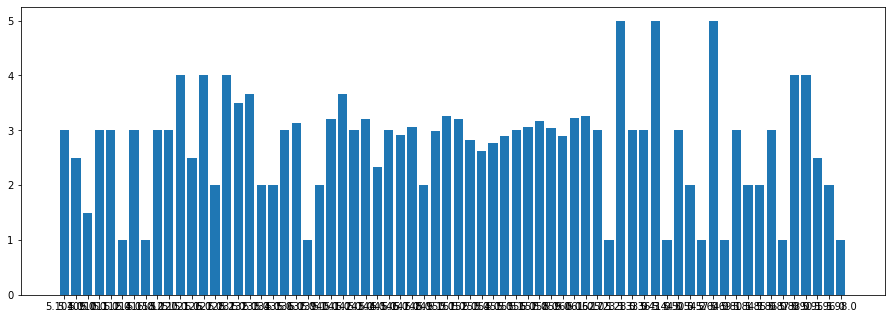

In [36]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(df_score_grab_by_version[0], df_score_grab_by_version[1])
plt.show()

In [37]:
pembatas= int(len(df_score_grab_by_version[1])/3)
firsthalf = df_score_grab_by_version.iloc[:pembatas]
half = df_score_grab_by_version.iloc[pembatas:pembatas*2]
lasthalf = df_score_grab_by_version.iloc[pembatas*2:pembatas*3]

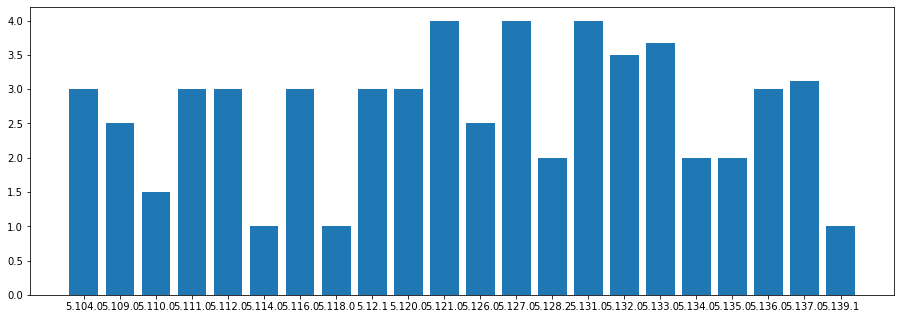

In [38]:
fig1 = plt.figure()
ax = fig1.add_axes([0,0,2,1])
ax.bar(firsthalf[0], firsthalf[1])
plt.show()

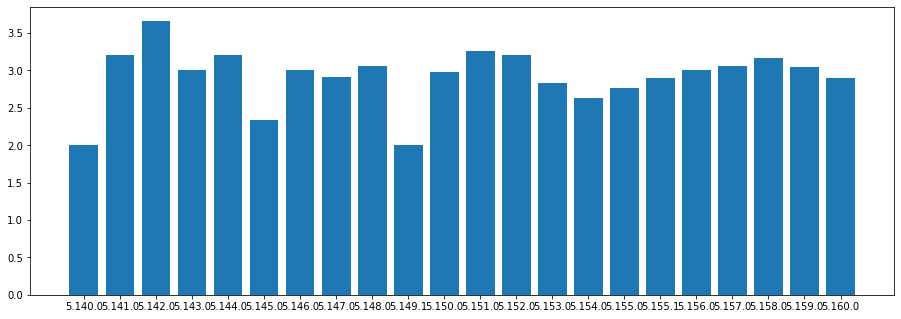

In [39]:
fig2 = plt.figure()
ax = fig2.add_axes([0,0,2,1])
ax.bar(half[0], half[1])
plt.show()

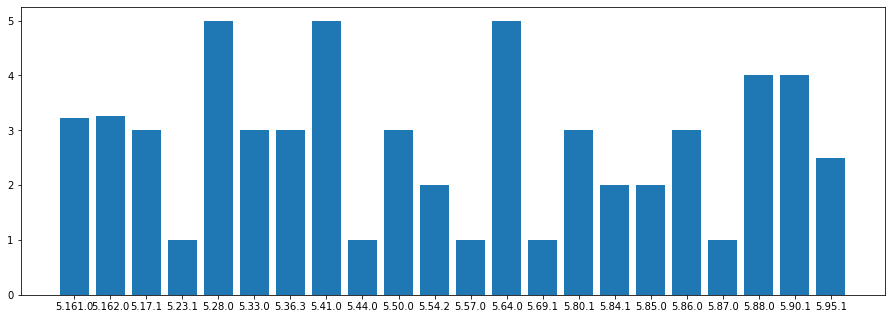

In [40]:
fig3 = plt.figure()
ax = fig3.add_axes([0,0,2,1])
ax.bar(lasthalf[0], lasthalf[1])
plt.show()

In [41]:
fig1.savefig(path+'review1.pdf', bbox_inches='tight')
fig2.savefig(path+'review2.pdf', bbox_inches='tight')
fig3.savefig(path+'review3.pdf', bbox_inches='tight')

#Split DataFrame to Data train and test

In [42]:
df = pd.DataFrame(app_reviews)
df = df.set_index('appId', inplace=False)
df = df.loc['com.grabtaxi.passenger']
df.reset_index(level=0, inplace=True)

df = df[["content", "score"]]


In [43]:
df.isna().sum()

content    0
score      0
dtype: int64

In [44]:
#sentimen jelek jika score < 3
#sentimen baik jika score >3
# score == 3 akan kita hilangkan

df = df[df['score'] != 3]

In [45]:
df.isna().sum()

content    0
score      0
dtype: int64

In [46]:
train, test = train_test_split(df, test_size = 0.2)

In [47]:
print(train.head())

                                                content  score
948                                Mau coba pke apk ini      4
1178      Jika naik grab selalu pelayanan yang terbaik.      5
973                                               bagus      4
61    Cacad, masuk kembali ke akun aja susah kali, v...      1
52    Entah gx ada apa" tiba" gx bisa masuk akun tib...      1


In [48]:
print(test.head())

                                                content  score
282   Min akun saya yg lama pake fb lama kata sandi ...      2
895   Saya tidak bisa login, krn Akun Email sudah td...      4
1115                                             Mygerb      5
968                                                  ok      4
314   Tolong infonya dong kenapa gabisa ganti nomer ...      2


# Create Sentiment

In [49]:
train.loc[train.score > 3, 'sentiment'] = 1
train.loc[train.score < 3, 'sentiment'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [50]:
test.loc[test.score >3, 'sentiment'] = 1
test.loc[test.score <3, 'sentiment'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

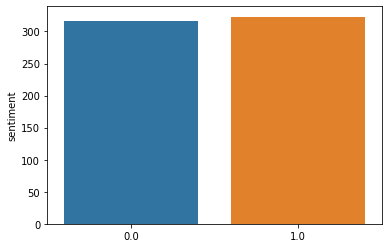

In [51]:
plot = sns.barplot(y = train.sentiment.value_counts(), x= train.sentiment.value_counts().index)

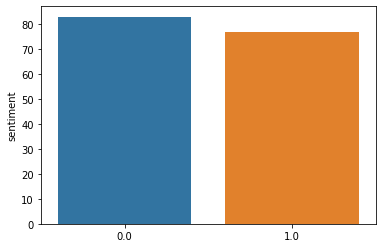

In [52]:
plot = sns.barplot(y = test.sentiment.value_counts(), x= test.sentiment.value_counts().index)

In [53]:
def cleansing(text):
  word_list = word_tokenize(text)
  word_list =[word for word in word_list if len(word) > 2 and word.isalnum() ]
  word_list = [word for word in word_list if string.punctuation not in word]
  text = ' '.join(word_list)

  return text

In [54]:
pd.options.mode.chained_assignment = None  # default='warn'

In [55]:
train['content_cleansing'] = train.content.apply(cleansing)
test['content_cleansing'] = test.content.apply(cleansing)

In [56]:
print(train.content_cleansing)

948                                  Mau coba pke apk ini
1178         Jika naik grab selalu pelayanan yang terbaik
973                                                 bagus
61      Cacad masuk kembali akun aja susah kali verifi...
52      Entah ada apa tiba bisa masuk akun tiba akun d...
                              ...                        
156     Akun saya tiba bekukan tanpa alasan jelas Pada...
312                     Konsultasi dokter lama respon nya
1005    Suka dgn layanannya memudahkan segalanya Lebih...
38      Aplikasi jelas akun cuma buat pesen makan doan...
1198                                       Aplikasi bagus
Name: content_cleansing, Length: 640, dtype: object


In [57]:
train.isna().sum()

content              0
score                0
sentiment            0
content_cleansing    0
dtype: int64

In [58]:
test.isna().sum()

content              0
score                0
sentiment            0
content_cleansing    0
dtype: int64

# Extraction

In [59]:
cv = CountVectorizer()
X_train = cv.fit_transform(train.content_cleansing)
X_test = cv.transform(test.content_cleansing)

#Model

In [60]:
#Model
model_mnb = MultinomialNB()
model_mnb.fit(X_train, train.sentiment)
y_pred = model_mnb.predict(X_test)
y_pred = y_pred.astype(np.int16)

#Eval

In [63]:
accuracy_score(test.sentiment, y_pred)

0.8375

In [64]:
f1_score(test.sentiment.astype(np.int16), y_pred)

0.8169014084507042

In [66]:
precision_score(test.sentiment, y_pred)

0.8923076923076924

In [67]:
recall_score(test.sentiment, y_pred)

0.7532467532467533

In [68]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1], dtype=int16)

In [69]:
confusion_matrix(test.sentiment, y_pred, labels= [0,1])

array([[76,  7],
       [19, 58]])

In [70]:
test.sentiment.value_counts()

0.0    83
1.0    77
Name: sentiment, dtype: int64